# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [227]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [228]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [229]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [230]:
import pandas as pd

column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
    'LSTAT', 'MEDV'
]

data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [231]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [232]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [233]:
# Features (X) = all columns except MEDV
X = data.drop('MEDV', axis=1)

# Target (y) = MEDV column
y = data['MEDV']


In [234]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [235]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [236]:
from sklearn.linear_model import LinearRegression

# Create the model
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

# Generate predictions on both training and testing sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)


## 3. Calculate and print R-squared for both the training and the testing set.

In [237]:
from sklearn.metrics import r2_score

# R-squared for training set
r2_train = r2_score(y_train, y_train_pred)

# R-squared for testing set
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("R-squared on Training Set: {:.4f}".format(r2_train))
print("R-squared on Testing Set: {:.4f}".format(r2_test))


R-squared on Training Set: 0.7509
R-squared on Testing Set: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [238]:
from sklearn.metrics import mean_squared_error

# MSE for training set
mse_train = mean_squared_error(y_train, y_train_pred)

# MSE for testing set
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Mean Squared Error on Training Set: {:.4f}".format(mse_train))
print("Mean Squared Error on Testing Set: {:.4f}".format(mse_test))


Mean Squared Error on Training Set: 21.6414
Mean Squared Error on Testing Set: 24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [239]:
from sklearn.metrics import mean_absolute_error

# MAE for training set
mae_train = mean_absolute_error(y_train, y_train_pred)

# MAE for testing set
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Mean Absolute Error on Training Set: {:.5f}".format(mae_train))
print("Mean Absolute Error on Testing Set: {:.5f}".format(mae_test))


Mean Absolute Error on Training Set: 3.31477
Mean Absolute Error on Testing Set: 3.18909


## Classification Model Evaluation

In [240]:
from sklearn.datasets import load_iris
data = load_iris()

In [241]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [242]:
column_names = data.feature_names

In [243]:
df = pd.DataFrame(data['data'],columns=column_names)

In [244]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [245]:
target = pd.DataFrame(data.target)

In [246]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [247]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [248]:
from sklearn.model_selection import train_test_split

# Define feature matrix (X) and target vector (y)
X = data['data']          # shape: (150, 4)
y = data['target']        # shape: (150,)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [249]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [250]:
from sklearn.metrics import accuracy_score

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.975
Test Accuracy: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [251]:
from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(y_train, y_train_pred))
print(balanced_accuracy_score(y_test, y_test_pred))


0.975609756097561
1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [252]:
from sklearn.metrics import precision_score

print(precision_score(y_train, y_train_pred, average='macro'))
print(precision_score(y_test, y_test_pred, average='macro'))


0.9761904761904763
1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [253]:
from sklearn.metrics import recall_score

print(recall_score(y_train, y_train_pred, average='macro'))
print(recall_score(y_test, y_test_pred, average='macro'))


0.975609756097561
1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [254]:
from sklearn.metrics import f1_score

print(f1_score(y_train, y_train_pred, average='macro'))
print(f1_score(y_test, y_test_pred, average='macro'))


0.974996093139553
1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [255]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))


[[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Decision Tree Accuracy: 1.0000
KNN Accuracy: 1.0000
SVM Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000


In [257]:
from sklearn.metrics import precision_score

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    print(f"{name} Precision: {precision:.6f}")


Decision Tree Precision: 1.000000
KNN Precision: 1.000000
SVM Precision: 1.000000
Random Forest Precision: 1.000000
Logistic Regression Precision: 1.000000


In [258]:

    print(name, f1_score(y_test, y_pred, average='macro'))


Logistic Regression 1.0


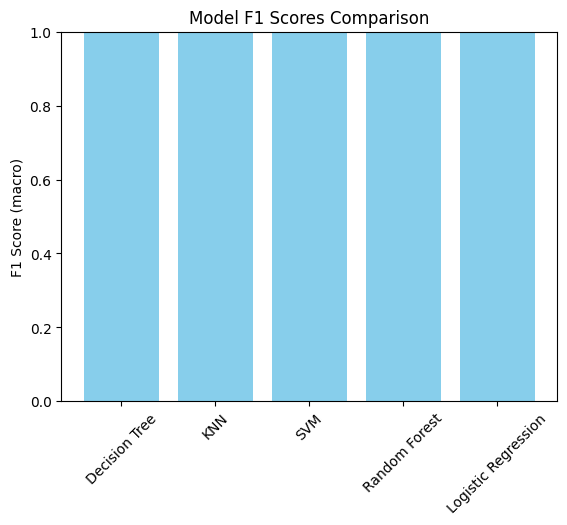

In [259]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

f1_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(score)

plt.bar(models.keys(), f1_scores, color='skyblue')
plt.ylabel('F1 Score (macro)')
plt.title('Model F1 Scores Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
